## Exploratory Data Analysis (EDA)

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as warn
warn.filterwarnings('ignore')

In [2]:
# Load the dataset
df=pd.read_csv('mushroom.csv')
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [3]:
# Display basic information
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [4]:
df.nunique()

Unnamed: 0                  976
cap_shape                     5
cap_surface                   4
cap_color                     9
bruises                       2
odor                          9
gill_attachment               4
gill_spacing                  3
gill_size                     2
gill_color                   12
stalk_shape                   2
stalk_root                    7
stalk_surface_above_ring      4
stalk_surface_below_ring      4
stalk_color_above_ring        9
stalk_color_below_ring        9
veil_type                     2
veil_color                    4
ring_number                   3
ring_type                     8
spore_print_color             9
population                    6
habitat                       7
class                         2
stalk_height                973
cap_diameter                976
dtype: int64

In [5]:
df.isnull().sum().any()

False

In [6]:
df.duplicated().any()

True

In [7]:
df[df.duplicated()]

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
34,1279,bell,smooth,pink,no,foul,notched,distant,broad,pink,...,universal,brown,one,zone,black,scattered,leaves,poisonous,5.291009,5.436304
70,1275,sunken,scaly,yellow,no,pungent,descending,distant,narrow,orange,...,partial,white,none,zone,white,numerous,leaves,poisonous,4.746453,10.769935
76,549,conical,grooves,brown,no,foul,free,distant,broad,white,...,partial,yellow,two,large,chocolate,solitary,woods,poisonous,12.206952,5.061715
109,1198,sunken,smooth,white,no,anise,attached,crowded,broad,black,...,partial,brown,two,sheathing,black,solitary,woods,edible,13.214007,14.549171
127,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,618,flat,grooves,green,yes,musty,notched,crowded,broad,chocolate,...,universal,yellow,one,zone,brown,abundant,meadows,poisonous,14.834383,2.053744
1994,871,flat,scaly,pink,no,spicy,attached,distant,narrow,red,...,universal,brown,two,zone,brown,abundant,meadows,poisonous,4.794826,4.576464
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020


In [8]:
df.describe(include='all')

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
count,2000.000000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000.000000,2000.000000
unique,NaN,5,4,9,2,9,4,3,2,12,...,2,4,3,8,9,6,7,2,NaN,NaN
top,NaN,sunken,scaly,brown,yes,foul,free,distant,narrow,orange,...,universal,white,one,sheathing,brown,abundant,urban,poisonous,NaN,NaN
freq,NaN,439,568,263,1023,274,540,677,1007,216,...,1010,553,689,305,255,360,316,1400,NaN,NaN
mean,624.974000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.449118,12.314345
std,375.091938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.697217,7.048845
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000
25%,290.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.291009,5.723521
50%,607.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.318596,12.124902
75%,957.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.781272,18.698605


In [9]:
df.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [10]:
num_col=[i for i in df.columns if df[i].dtype!='object']
num_col

['Unnamed: 0', 'stalk_height', 'cap_diameter']

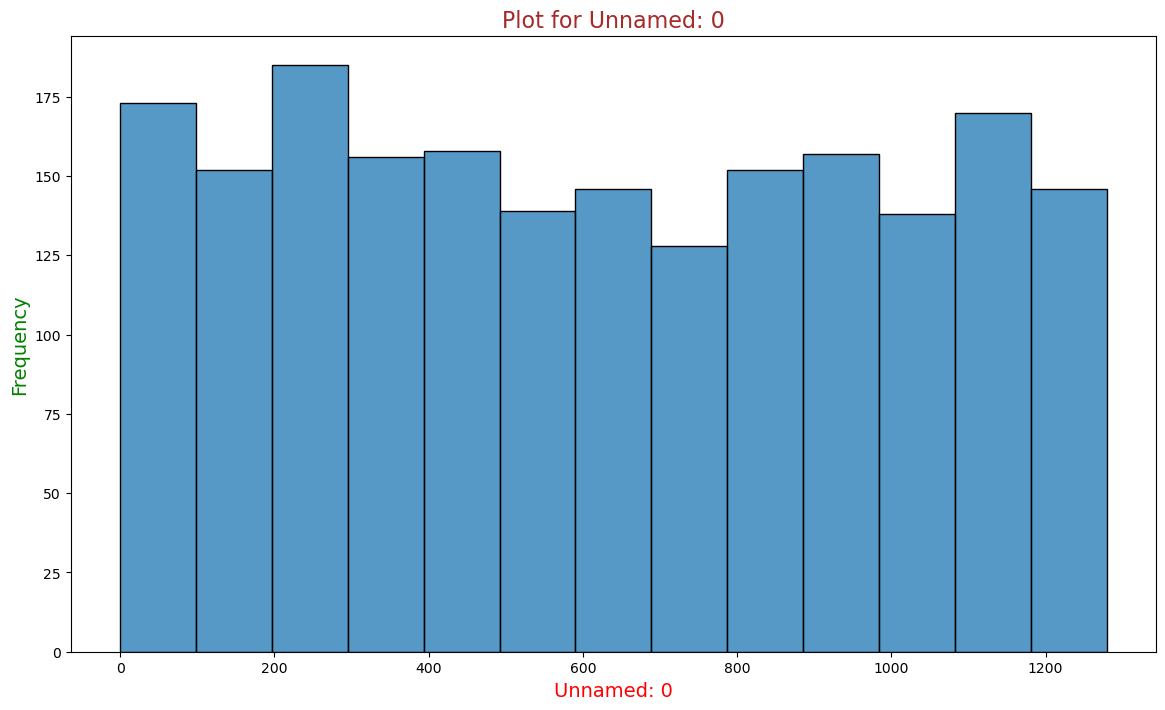

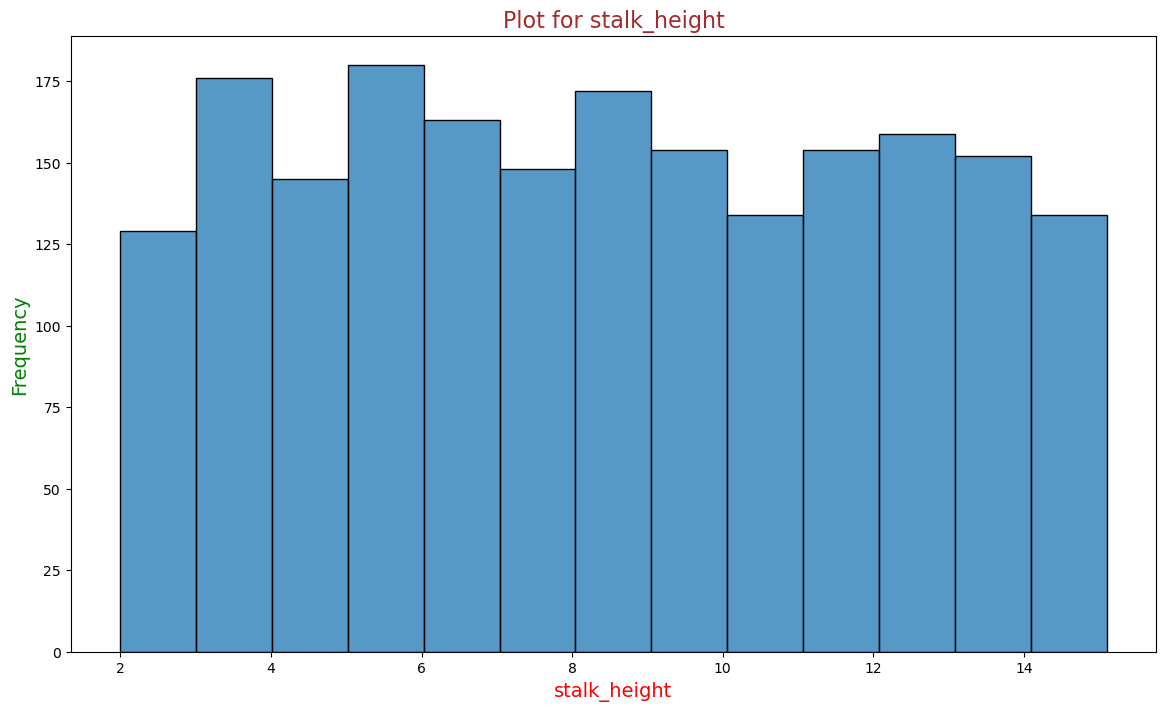

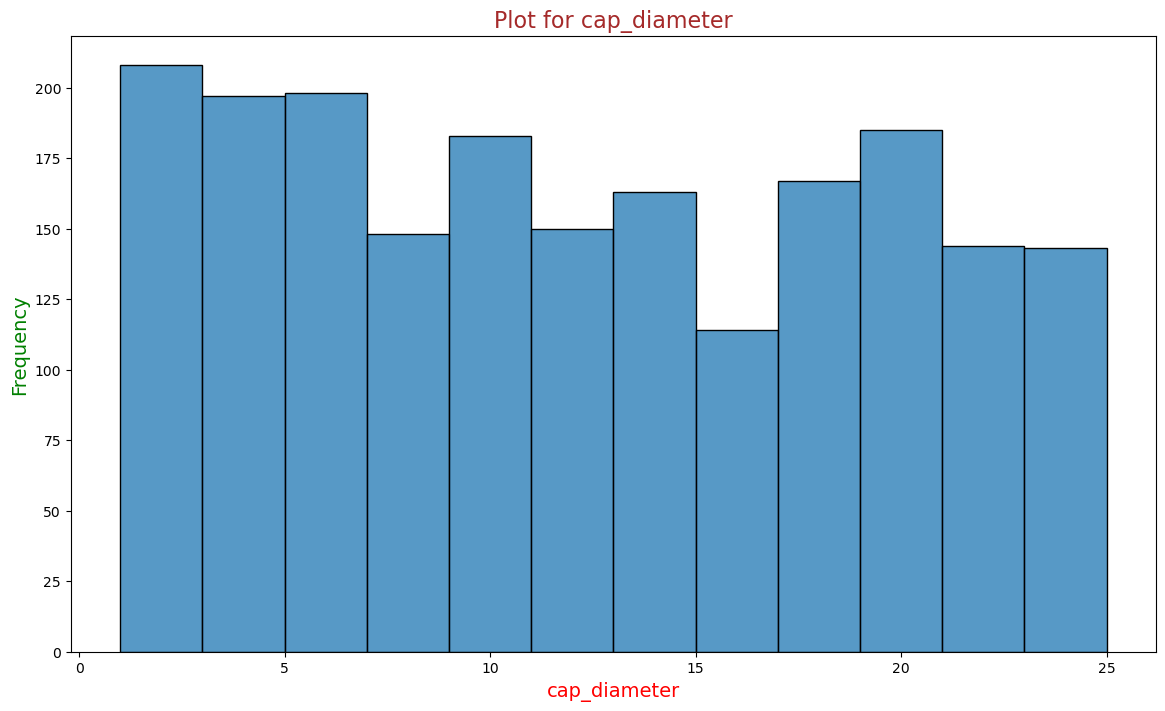

In [11]:
for columns in num_col:
    plt.figure(figsize=(14,8))
    sns.histplot(data=df , x=columns)
    plt.xlabel(columns , color='red' , fontsize=14) 
    plt.ylabel('Frequency' , color='green' , fontsize=14) 
    plt.title(f'Plot for {columns}' , color='brown' , fontsize=16)  
    plt.show()
    plt.show()

<Axes: >

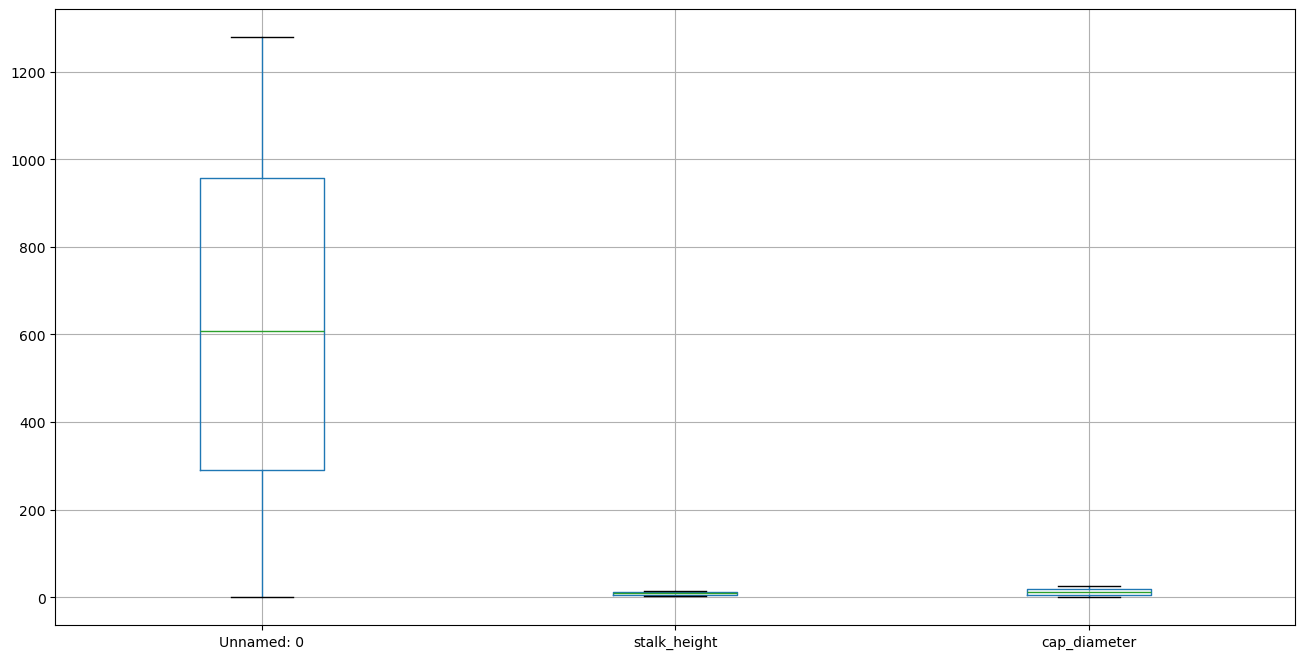

In [12]:
df.boxplot(figsize=(16,8))

In [13]:
corr=df[num_col].corr()

<Axes: >

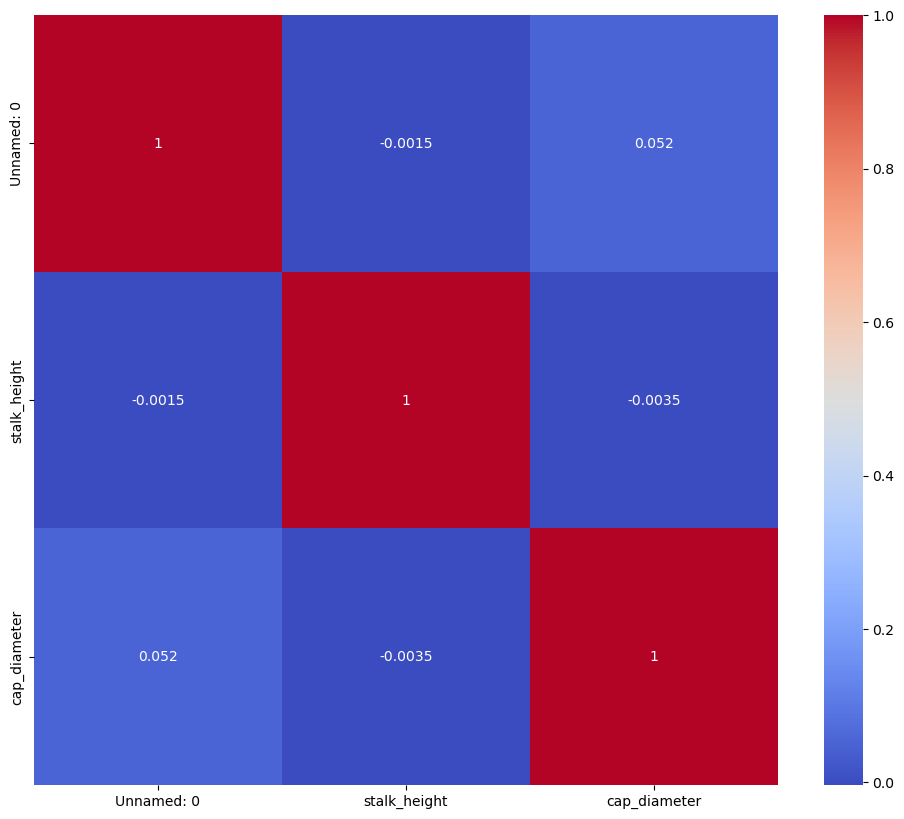

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,cmap=plt.cm.coolwarm)

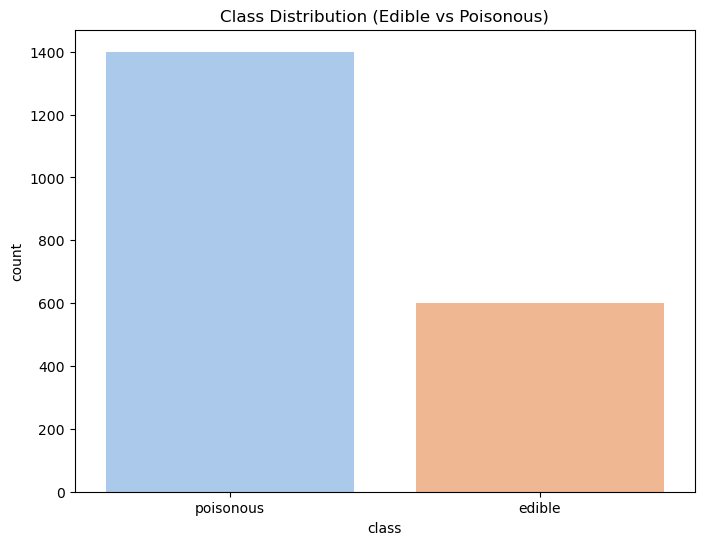

In [15]:
# Class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='class', palette='pastel')
plt.title("Class Distribution (Edible vs Poisonous)")
plt.show()

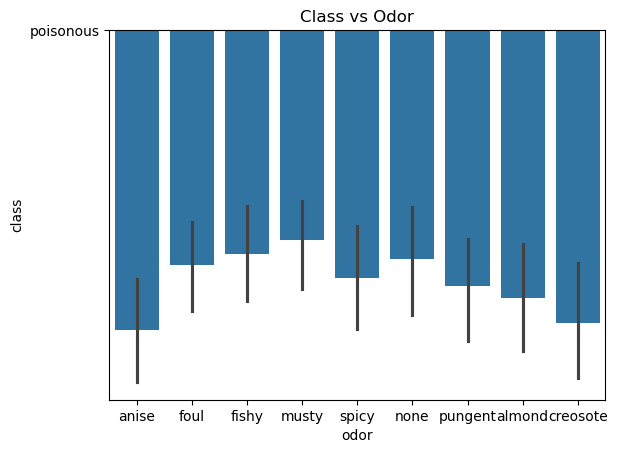

In [16]:
sns.barplot(x="odor", y="class", data=df)
plt.title("Class vs Odor")
plt.show()


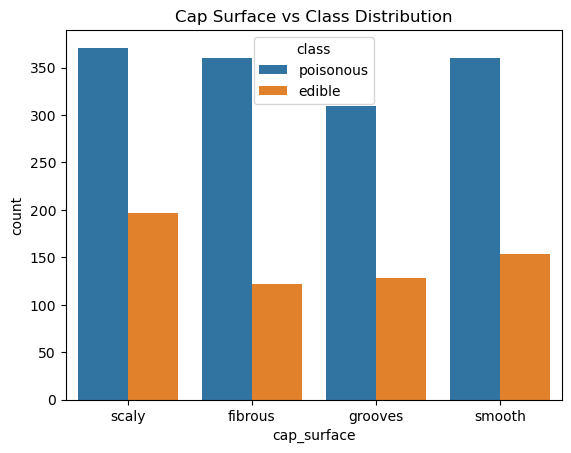

In [17]:
sns.countplot(x="cap_surface", hue="class", data=df)
plt.title("Cap Surface vs Class Distribution")
plt.show()


In [18]:
# Feature correlation (if categorical, use label encoding)
le = LabelEncoder()
encoded_df = df.apply(le.fit_transform)


##  Data Preprocessing

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Encode categorical features
df_encoded = df.apply(le.fit_transform)

In [21]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [22]:
# Separate features and target variable
X = df_encoded.drop("class", axis=1)
y = df_encoded["class"]

In [23]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [24]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (1600, 25)
Testing set shape: (400, 25)


##  Data Visualization

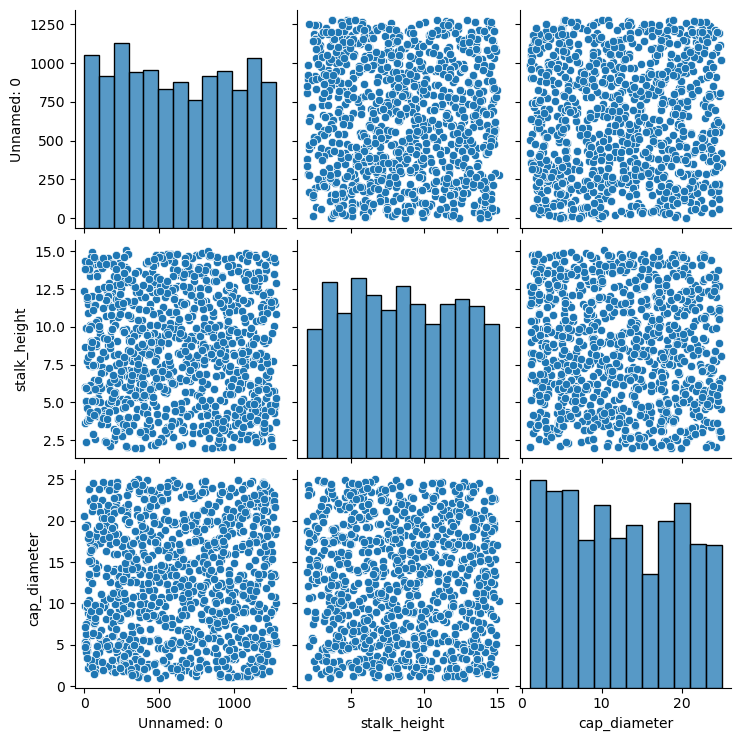

In [25]:
sns.pairplot(df)

<Axes: >

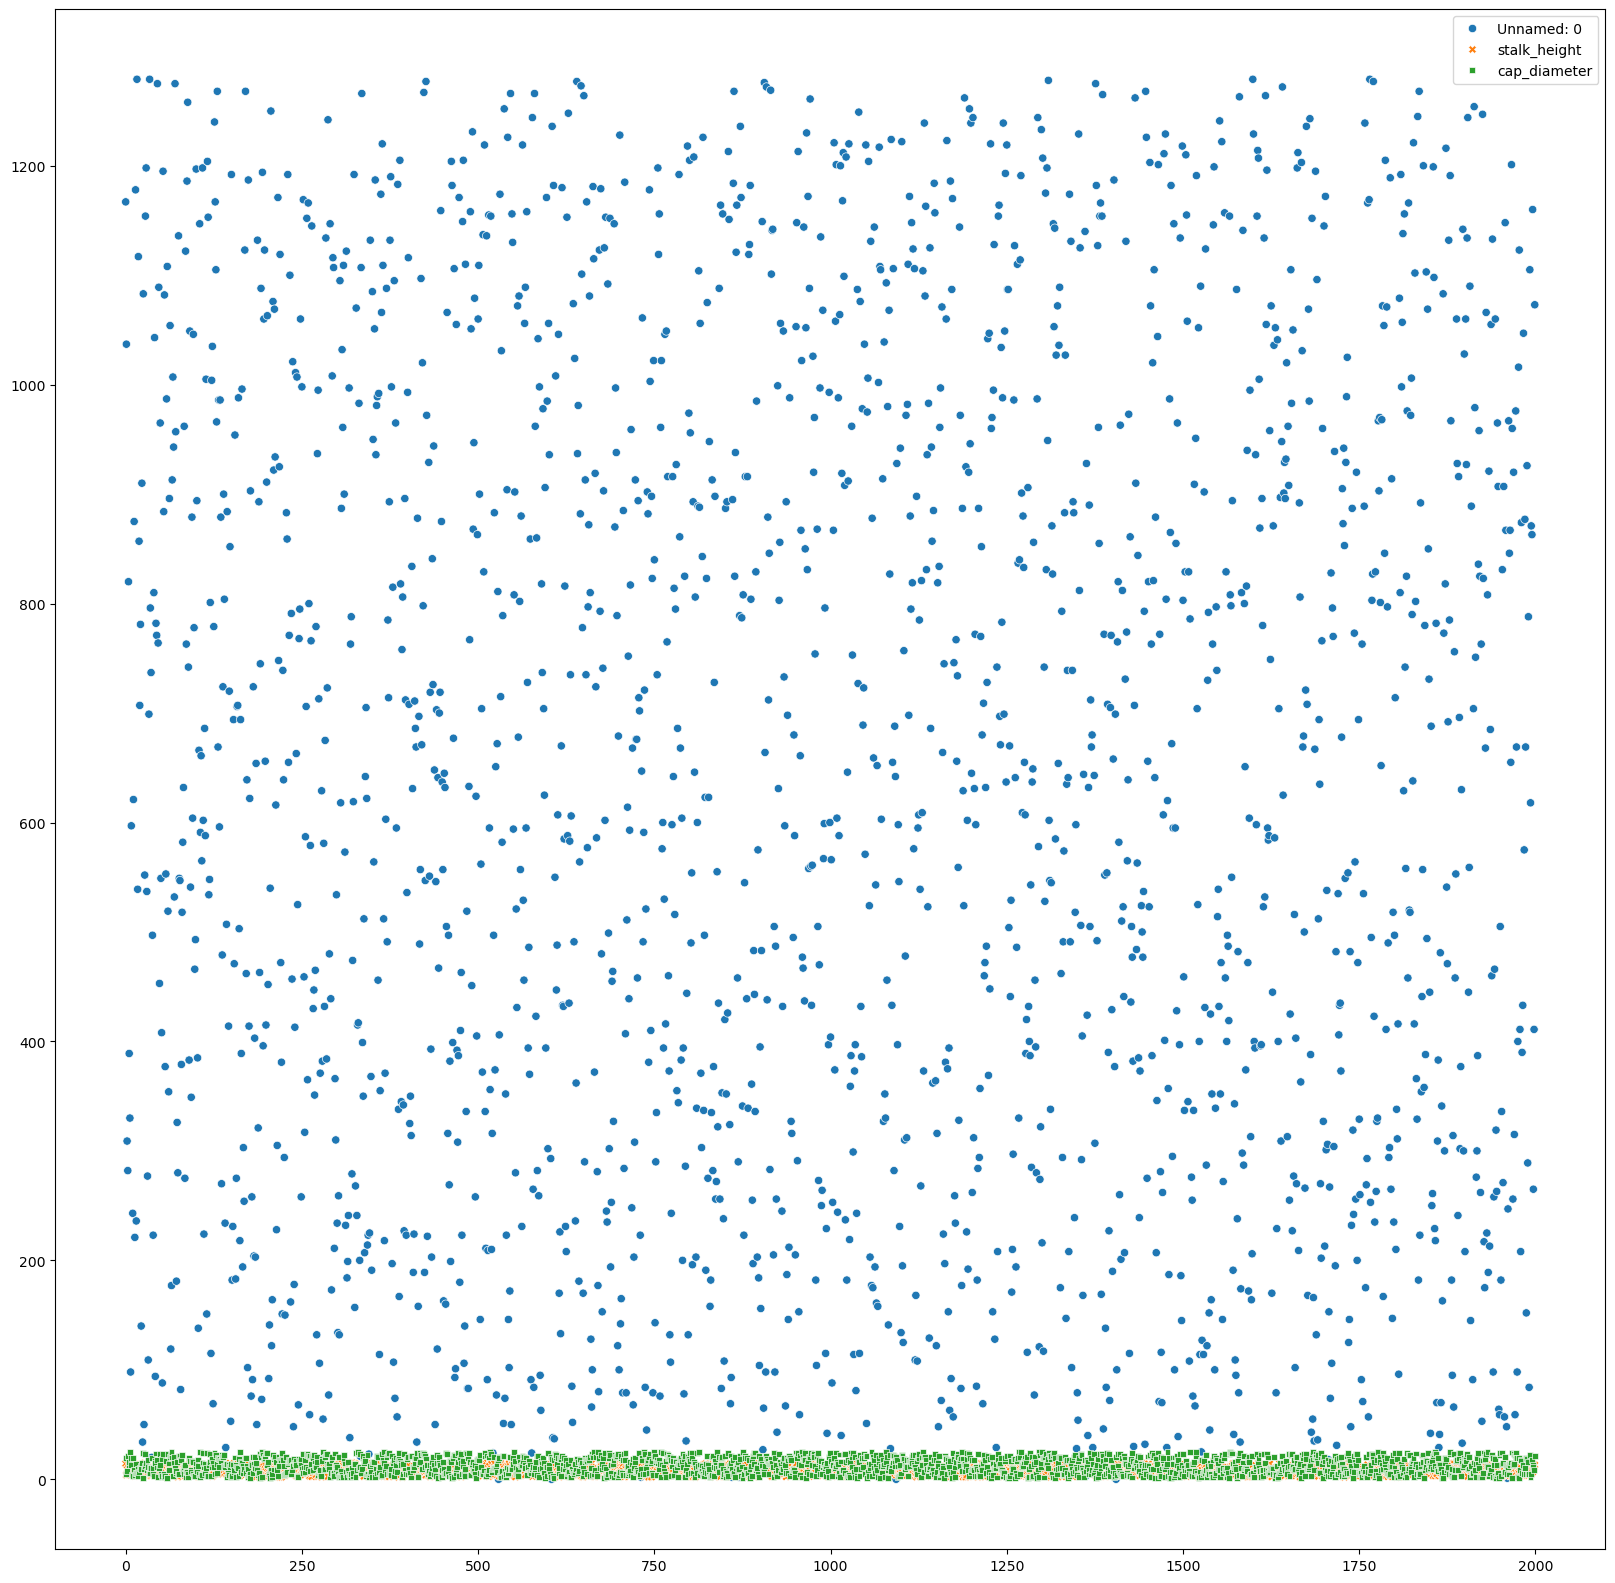

In [26]:
plt.figure(figsize=(20,20))
sns.scatterplot(df)

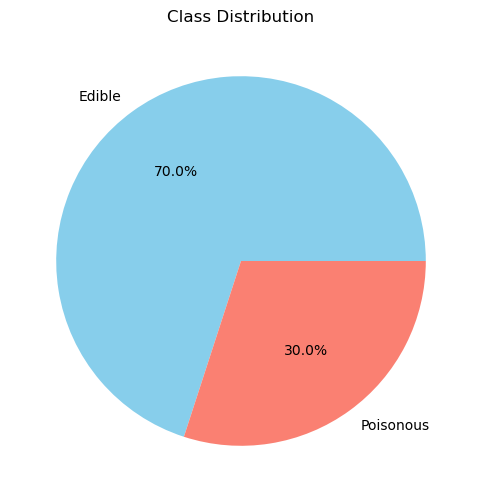

In [27]:
# Visualize class distribution
plt.figure(figsize=(6, 6))
df["class"].value_counts().plot.pie(autopct="%1.1f%%", labels=["Edible", "Poisonous"], colors=["skyblue", "salmon"])
plt.title("Class Distribution")
plt.ylabel("")
plt.show()


## SVM Implementation

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


In [29]:
# Step 1: Create the SVM model
svm_model = SVC(kernel='linear',random_state=42)


In [30]:
# Step 2: Train the model on the training data
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [31]:
# Step 3: Make predictions on the testing data
y_pred = svm_model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [32]:
# Step 4: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)


In [33]:
print("SVM Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

SVM Performance Metrics:
Accuracy: 0.7000
Precision: 0.7000
Recall: 1.0000
F1-Score: 0.8235


In [34]:
# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Edible', 'Poisonous']))



Classification Report:
              precision    recall  f1-score   support

      Edible       0.00      0.00      0.00       120
   Poisonous       0.70      1.00      0.82       280

    accuracy                           0.70       400
   macro avg       0.35      0.50      0.41       400
weighted avg       0.49      0.70      0.58       400



In [35]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[  0 120]
 [  0 280]]


## Visualization of SVM Results

In [36]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

In [37]:
# Reduce features to 2D using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [38]:
# Train SVM on reduced data
svm_model_pca = SVC(kernel='linear',random_state=42)
svm_model_pca.fit(X_train_pca, y_train)

SVC(kernel='linear', random_state=42)

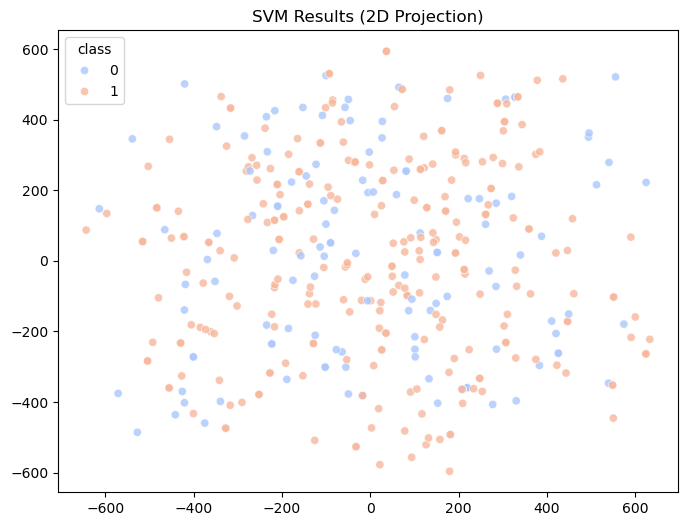

In [39]:
# Visualize decision boundary
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_test, palette="coolwarm", alpha=0.8)
plt.title("SVM Results (2D Projection)")
plt.show()

## Parameter Tuning and Optimization

In [40]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    "C": [0.01,0.1,1.0, 10],
    "gamma": [0.01, 0.1, 1.0,10],
    "kernel": ["linear", "poly", "rbf"]
}

In [41]:
# Grid Search
model=SVC()

In [42]:
grid_search = GridSearchCV(model, param_grid, cv=5)

## Comparison and Analysis

In [43]:
final_model = SVC(C=0.5,gamma=0.001,kernel='rbf')

In [44]:
final_model.fit(X_train,y_train)

SVC(C=0.5, gamma=0.001)

In [45]:
f_pred = final_model.predict(X_train)

In [46]:
confusion_matrix(y_train,f_pred)

array([[ 310,  170],
       [   0, 1120]], dtype=int64)

In [47]:
print(classification_report(y_train,f_pred))

              precision    recall  f1-score   support

           0       1.00      0.65      0.78       480
           1       0.87      1.00      0.93      1120

    accuracy                           0.89      1600
   macro avg       0.93      0.82      0.86      1600
weighted avg       0.91      0.89      0.89      1600



## Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

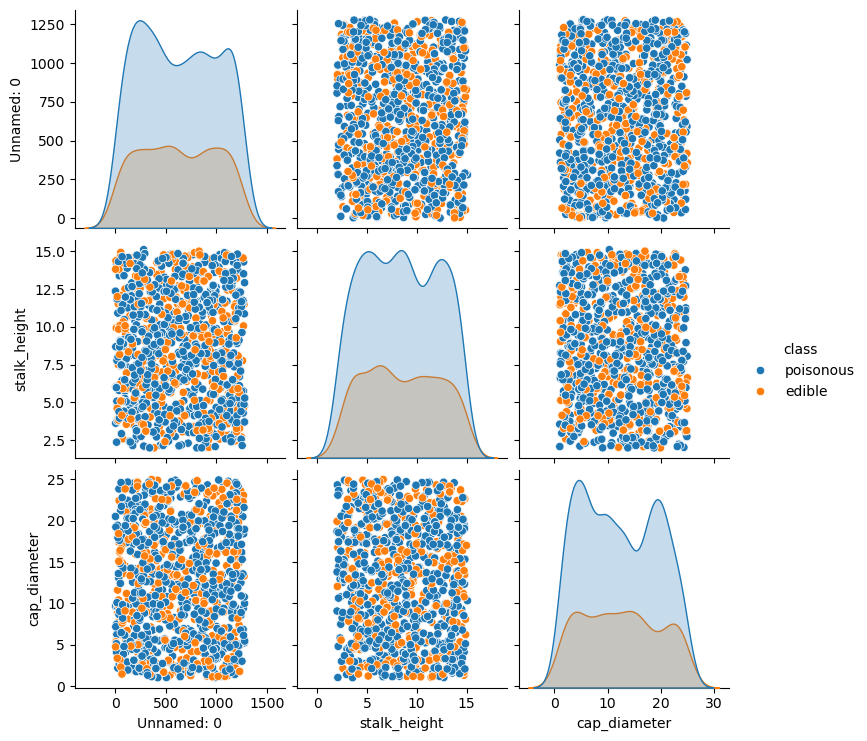

In [49]:
# Pair plot for visualizing relationships
sns.pairplot(df, hue='class') 
plt.show()

In [51]:
## Discuss practical implications of SVM in real-world classification tasks.

Practical Implications of SVM in Real-World Classification Tasks

Text and Sentiment Analysis :-

Commonly applied in Natural Language Processing (NLP) tasks like spam filtering, sentiment analysis, and text categorization.

 Fraud Detection :-
 
SVMs can analyze transactional data to detect fraudulent activity in banking or e-commerce.

In [52]:
##end